# Blenheim Chalcot Data Science Challenge: Section 1

## Section 1: Analysis Task

I am going to be answering the questions provided in the pdf which you can also follow in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("dataset_Facebook.csv", delimiter=";")

In [3]:
data.head()



,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Question 1: How many features and obeservations are present in the data set?



In [4]:
print("Number of features:", len(data.columns))
print("Number of observations:", len(data))

Number of features: 19
Number of observations: 500


## Question 2: Identify the only categorical variable, how many levels does it have and what is the counts at each level?

In [5]:
data.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

In [6]:
data["Type"].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

The only categorical variable is the variable "Type". 

It as 4 levels with counts:
- Photo: 426
- Status: 45
- Link: 22
- Video: 7


## Question 3: We want to compare the density/ distributions of the first, fourth and seventh variables in the data set with each variable's density plot being split by the levels of the categorical variable.

### a) Each variables density plot, should contain n-density plots, where n is the number of levels the categorical variable has.

### b) Thus variable 1 will have n density plots, variable 4 will have n density plots and variable 7 should have n density plots

Firstly, let's segment the data so it is ordered by the levels in our "Type" column.

In [7]:
data1 = data.sort_values(by=["Type"])
sorted_data = data1.reset_index()

Lets define a function which plots these densities split by each level.

In [8]:
def density_plot(data, variable, bins=20):
    """Plots 4 different graphs eaching showing the different density plots for the levels
    Photo, status, Link and video. 
    Takes input:
    data - the data we are plotting.
    variable - the variable we want to see the density of.
    bins = number of bins for density plot."""
    
    fig, ax = plt.subplots(2, 2, figsize=(20,10))
    
    ax[0][0].hist(data[variable][:21], bins=bins)
    ax[0][1].hist(data[variable][21:448], bins=bins)
    ax[1][0].hist(data[variable][448:492], bins=bins)
    ax[1][1].hist(data[variable][492:499], bins=bins)
    
    ax[0][0].set_title("Link", fontsize=20)
    ax[0][1].set_title("Photo", fontsize=20)
    ax[1][0].set_title("Status", fontsize=20)
    ax[1][1].set_title("Video", fontsize=20)
    
    ax[0][0].set_ylabel("Frequency")
    ax[0][1].set_ylabel("Frequency")
    ax[1][0].set_ylabel("Frequency")
    ax[1][1].set_ylabel("Frequency")
    
    plt.suptitle("Density of Variable: {}".format(variable.title()), fontsize=32)

    plt.show()
    

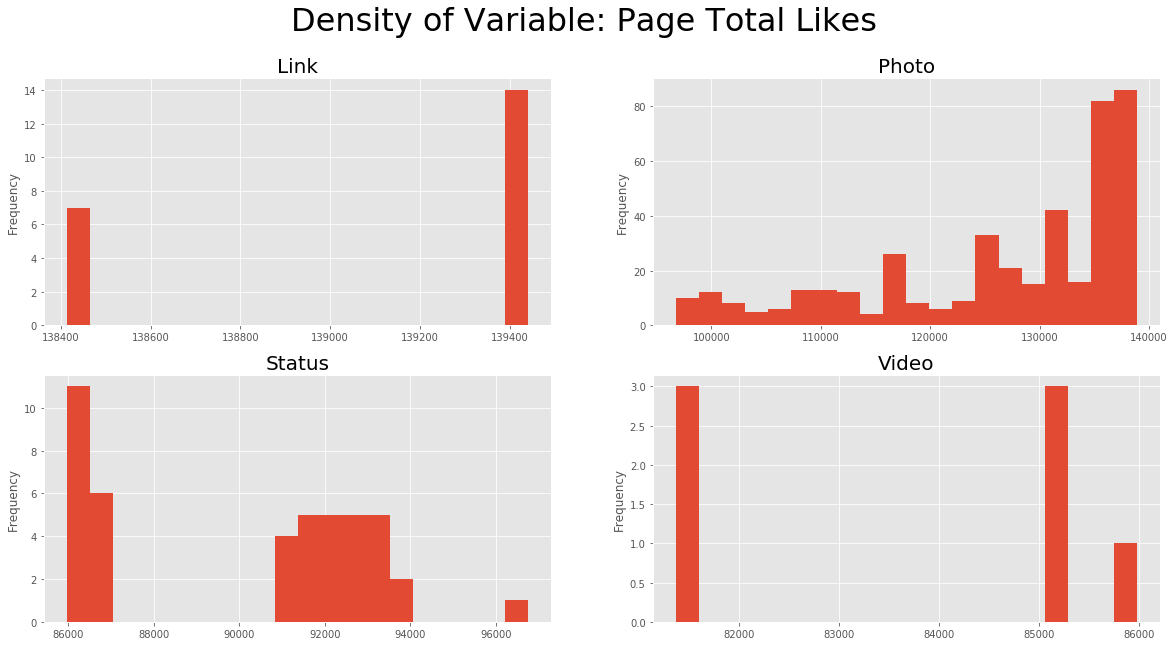

In [9]:
density_plot(data, "Page total likes")

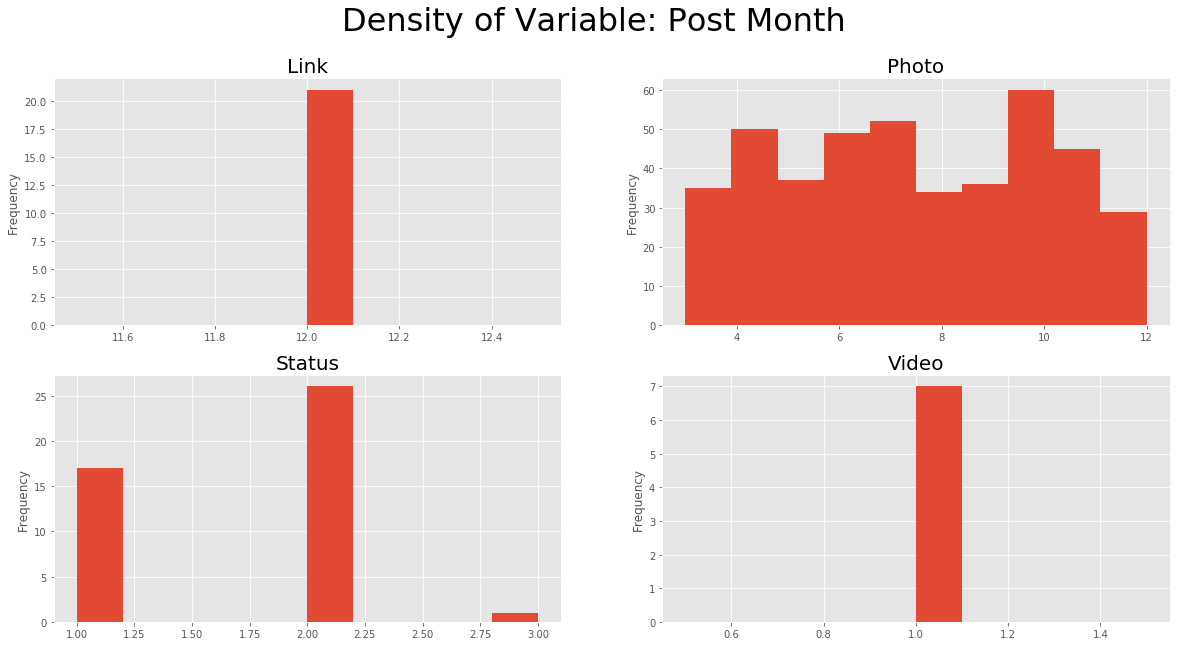

In [10]:
density_plot(data, "Post Month", bins=10)

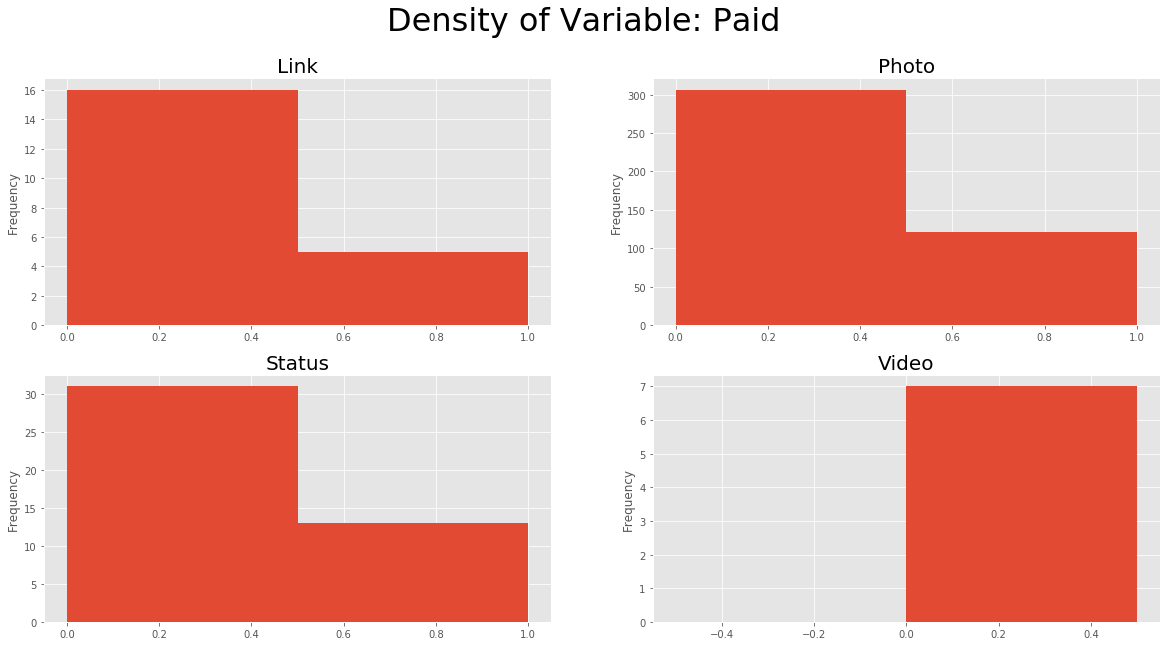

In [11]:
density_plot(data, "Paid", bins=2)

## Question 4: We're interested in the variables that have the highest and lowest correlations in our data set.

### a) Identify the two most strongly correlated variables.

### b) Identify the least correlated variables.

### c) Produce a plot to represent the correlation matrix.

In [12]:
num_data = data.drop(["Type"], axis=1)

In [13]:
corr_matrix = num_data.corr()
corr_matrix.style.background_gradient() #Clearly see correlated and uncorrelated variables

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Page total likes,1,-0.0911422,0.941192,-0.00540119,-0.143807,0.0053411,-0.0832446,-0.10254,-0.111922,-0.149129,-0.12824,-0.0961087,-0.0605163,0.033699,0.0318907,0.0532764,-0.00485862,0.0452305
Category,-0.0911422,1,-0.12769,-0.0532388,-0.107383,-0.0224738,-0.142073,-0.0943681,0.00339205,-0.0311716,-0.149443,-0.0478035,-0.104456,0.021569,0.0278424,0.126786,0.149211,0.127307
Post Month,0.941192,-0.12769,1,0.0170495,-0.17639,-0.0189343,-0.102506,-0.101616,-0.115898,-0.147083,-0.142829,-0.0946243,-0.0920124,0.0109563,0.00617353,0.0256333,-0.0218592,0.0183621
Post Weekday,-0.00540119,-0.0532388,0.0170495,1,0.0458573,-0.00196317,-0.0501549,-0.0336736,-0.0483819,-0.029602,-0.0215646,-0.0464425,-0.0687408,0.00114361,-0.0772095,-0.0823224,-0.0487135,-0.081049
Post Hour,-0.143807,-0.107383,-0.17639,0.0458573,1,-0.0694635,0.00333762,0.0127473,0.00387867,0.0122221,0.0787592,0.0388916,0.052412,0.0380108,0.000921755,-0.0245235,-0.0586802,-0.0274206
Paid,0.0053411,-0.0224738,-0.0189343,-0.00196317,-0.0694635,1,0.146631,0.0625638,0.117014,0.0976786,0.0974618,0.00321082,0.110043,0.0541626,0.0757611,0.110694,0.0768213,0.107739
Lifetime Post Total Reach,-0.0832446,-0.142073,-0.102506,-0.0501549,0.00333762,0.146631,1,0.694926,0.570629,0.477908,0.324362,0.322254,0.743053,0.400756,0.427155,0.545185,0.456312,0.538597
Lifetime Post Total Impressions,-0.10254,-0.0943681,-0.101616,-0.0336736,0.0127473,0.0625638,0.694926,1,0.368553,0.315201,0.226081,0.850787,0.651933,0.323843,0.316612,0.345091,0.286829,0.343358
Lifetime Engaged Users,-0.111922,0.00339205,-0.115898,-0.0483819,0.00387867,0.117014,0.570629,0.368553,1,0.968213,0.67684,0.260346,0.61208,0.839279,0.505806,0.569565,0.531261,0.572159
Lifetime Post Consumers,-0.149129,-0.0311716,-0.147083,-0.029602,0.0122221,0.0976786,0.477908,0.315201,0.968213,1,0.706666,0.222941,0.503847,0.81351,0.334621,0.349152,0.343048,0.354502


### Most correlated variables:

- "like" and "Total Interactions" (0.9977)
- Lifetime engaged users and Lifetime Post Consumers (0.9682)

### Top 3 least correlated variables:
- "Lifetime Post Impressions by people who have liked you Page" and "Paid" (0.003211)
- "Post Weekday" and "Page total likes" (-0.005401)
- "Paid" and "Page total likes" (0.005341)